In [10]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [11]:
#Oppgave 1
#Importering av dataset
df = pd.read_csv('Grocery_dataset.csv')

#Print av de 10 øverste linjene, og 10 nederste.
print(df.head(10), df.tail(10))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  1

In [12]:
#Oppgave 2
# Sjekker om det finnes nullverdier
df.isnull().sum()


Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Oppgave 3
#Sjekk unike Outlet størrelser
print("Unique values in Outlet_Size:", df['Outlet_Size'].unique())

#Telle hvor mange unike outlets (excluding NaN)
print("Number of unique Outlet_Size values:", df['Outlet_Size'].nunique())

#Count frequency of each Outlet_Size
outlet_size_counts = df['Outlet_Size'].value_counts()
print("\nCounts for each Outlet_Size:\n", outlet_size_counts)

#Find maximum and minimum outlet sizes by frequency
print("\nMost frequent (max) Outlet_Size:", outlet_size_counts.idxmax(), 
      "with", outlet_size_counts.max(), "occurrences")

print("Least frequent (min) Outlet_Size:", outlet_size_counts.idxmin(), 
      "with", outlet_size_counts.min(), "occurrences")

Unique values in Outlet_Size: ['Medium' nan 'High' 'Small']
Number of unique Outlet_Size values: 3

Counts for each Outlet_Size:
 Outlet_Size
Medium    1605
Small     1398
High       558
Name: count, dtype: int64

Most frequent (max) Outlet_Size: Medium with 1605 occurrences
Least frequent (min) Outlet_Size: High with 558 occurrences


In [14]:
#Oppgave4 

# Finn unike Item_Fat_Content verdier
unique_fat = df['Item_Fat_Content'].unique()
print("Unique Item_Fat_Content types:", unique_fat)

# Tell hver gang noe blit funnet
print("\nCounts per type:\n", df['Item_Fat_Content'].value_counts())

#Med bare koden over defineres Low Fat og low fat som forksjellige. Så med koden under, legges de under samme kategori.

# Standardize Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Skjekk igjen
print(df['Item_Fat_Content'].unique())



Unique Item_Fat_Content types: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Counts per type:
 Item_Fat_Content
Low Fat    3008
Regular    1679
LF          183
reg          68
low fat      62
Name: count, dtype: int64
['Low Fat' 'Regular']


In [15]:
#Oppgave 5

# Drop columns by index position (0 and 6)
Grc_new_df = df.drop(df.columns[[0, 6]], axis=1)

# Show the new DataFrame shape
print("Shape of Grc_new_df:", Grc_new_df.shape)

# Optional: show first few rows
Grc_new_df.head()

Shape of Grc_new_df: (5000, 10)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
#Oppgave 6
#Lager to forskjelllige typer lister. (dataframes)
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

print(SupType_1)

      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0            9.30          Low Fat         0.016047                  Dairy   
2           17.50          Low Fat         0.016760                   Meat   
4            8.93          Low Fat         0.000000              Household   
6           13.65          Regular         0.012741            Snack Foods   
8           16.20          Regular         0.016687           Frozen Foods   
...           ...              ...              ...                    ...   
4993         5.98          Low Fat         0.075675            Hard Drinks   
4994        18.75          Low Fat         0.010382              Household   
4995         5.82          Regular         0.077476  Fruits and Vegetables   
4996         8.52          Low Fat         0.027059            Soft Drinks   
4998        16.70          Regular         0.119462  Fruits and Vegetables   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Lo

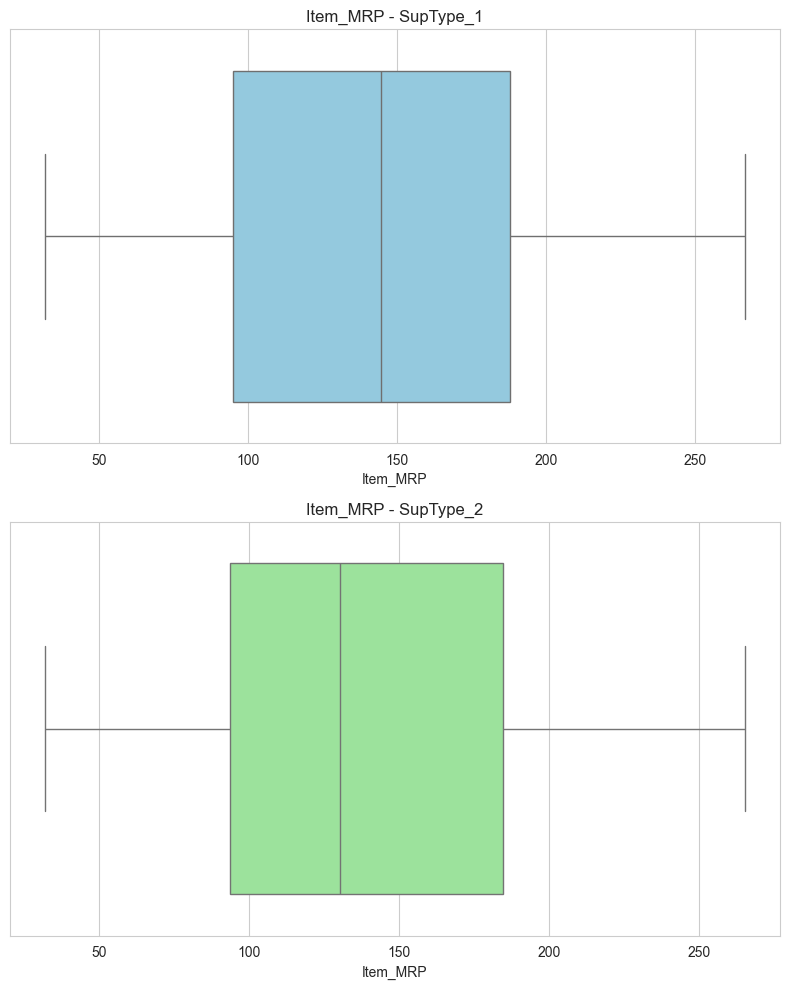

In [17]:
#Oppgave 7
# Bruk ggplot stil
sns.set_style("whitegrid")

# Lager subplots (2 rader, 1 kolonne)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Boxplot for SupType_1
sns.boxplot(x=SupType_1['Item_MRP'], ax=axes[0], color="skyblue")
axes[0].set_title("Item_MRP - SupType_1")

# Boxplot for SupType_2
sns.boxplot(x=SupType_2['Item_MRP'], ax=axes[1], color="lightgreen")
axes[1].set_title("Item_MRP - SupType_2")

plt.tight_layout()
plt.show()

In [18]:
#Oppgave 8
# Slår sammen de to DataFrames (SupType_1 og SupType_2)
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sorterer etter kolonnen Item_Outlet_Sales i stigende rekkefølge
Grc_Concat_df = Grc_Concat_df.sort_values(by="Item_Outlet_Sales", ascending=True)

# Henter ut Outlet_Location_Type for raden med lavest salg
lowest_sales_location = Grc_Concat_df.iloc[0]['Outlet_Location_Type']

print("Outlet_Location_Type for butikken med lavest salg:", lowest_sales_location)


Outlet_Location_Type for butikken med lavest salg: Tier 3
